# <font size='7'><font color='Blue'>Company Financials Analysis</font>
 > #### *Analyzing Financial Data of a Company for Strategic Insights*

## Introduction
This data analytics project focuses on conducting a comprehensive analysis of a company's financial data to gain insights into various aspects of the business. By employing data preparation techniques, discount analysis, profit margin analysis, regression analysis, and polynomial regression, we aim to uncover valuable information that can help in business decisions and strategies.

## Data Used
The primary dataset utilized in this project is obtained from https://www.kaggle.com/datasets/atharvaarya25/financials. It contains essential information related to sales transactions, including details such as product, price, discounts, costs of goods sold, and various time-related attributes.

## Tools
To conduct this analysis, we employed the following Python libraries and tools:

- Pandas: Data manipulation and analysis.
- Numpy: Numerical operations and array manipulation.
- Matplotlib: Data visualization.
- Seaborn: Enhanced data visualization.
- Scikit-learn: Machine learning tools for regression analysis.

## Objective
Our project has the following objectives:

1. perform comprehensive exploratory data analysis (EDA) on a provided financial dataset.

2. This includes loading the dataset, handling missing values, and implementing various data analysis components such as 
   discount analysis, profit margin analysis, simple linear regression, and polynomial regression.

3. The goal is to gain insights into segments, countries, discounts, time series, and profit margins, and to present these 
   findings through visualizations and documentation.

4. Analyze the correlation between product prices and units sold using simple linear regression.

5. Determine the impact of the month of the year on gross sales through polynomial regression.

## Analysis:-

### Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer

### Step 1: Data Preparation

##### 1.1 Load the Dataset
- Download the dataset from the provided URL and load it into a pandas dataframe.

In [4]:
file_path = r"E:\Company Fin\Financial.csv" 
df = pd.read_csv(file_path)

In [5]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01-01-2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01-01-2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01-06-2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01-06-2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01-06-2014,6,June,2014


#### 1.2 Handling Pre-processing issues

* As there are some unnecessary whitespaces present in column names that needs to be changed

In [6]:
df.rename(columns={' Product ': 'Product', ' Discount Band ': 'Discount_Band', ' Units Sold ': 'Units_Sold',
                   ' Manufacturing Price ': 'Manufacturing_Price', ' Sale Price ': 'Sale_Price',
                    ' Gross Sales ': 'Gross_Sales', ' Discounts ': 'Discounts', '  Sales ': 'Sales', ' COGS ': 'COGS',
                    ' Profit ': 'Profit', 'Month Number': 'Month_Number'}, inplace=True)

In [7]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discount_Band', 'Units_Sold',
       'Manufacturing_Price', 'Sale_Price', 'Gross_Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month_Number', 'Month Name',
       'Year'],
      dtype='object')

* Removing  <br> '$' <br> ',' <br> and replacing <br> '-' to '0'  from the data,

In [8]:
df = df.replace({'\$':''}, regex = True)
df = df.replace({'\,':''}, regex = True)
replacement_rules = {'Discounts' : {'-': '0'}}
df.replace(replacement_rules, regex = True, inplace = True)

In [9]:
df.head()

,Segment,Country,Product,Discount_Band,Units_Sold,Manufacturing_Price,Sale_Price,Gross_Sales,Discounts,Sales,COGS,Profit,Date,Month_Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.50,3.00,20.00,32370.00,0,32370.00,16185.00,16185.00,01-01-2014,1,January,2014
1,Government,Germany,Carretera,None,1321.00,3.00,20.00,26420.00,0,26420.00,13210.00,13210.00,01-01-2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.00,3.00,15.00,32670.00,0,32670.00,21780.00,10890.00,01-06-2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.00,15.00,13320.00,0,13320.00,8880.00,4440.00,01-06-2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.00,3.00,15.00,37050.00,0,37050.00,24700.00,12350.00,01-06-2014,6,June,2014


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Segment              700 non-null    object
 1   Country              700 non-null    object
 2   Product              700 non-null    object
 3   Discount_Band        700 non-null    object
 4   Units_Sold           700 non-null    object
 5   Manufacturing_Price  700 non-null    object
 6   Sale_Price           700 non-null    object
 7   Gross_Sales          700 non-null    object
 8   Discounts            700 non-null    object
 9   Sales                700 non-null    object
 10  COGS                 700 non-null    object
 11  Profit               700 non-null    object
 12  Date                 700 non-null    object
 13  Month_Number         700 non-null    int64 
 14  Month Name           700 non-null    object
 15  Year                 700 non-null    int64 
dtypes: int64

* Many numerical features have dtype as object which needs to be changed to numeric

In [11]:
numeric_cols = ['Units_Sold', 'Manufacturing_Price', 'Sale_Price', 'Gross_Sales', 'Discounts', 'Sales', 'COGS', 'Profit']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce')

* Changing 'Date' column's dtype to datetime

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount_Band        700 non-null    object        
 4   Units_Sold           700 non-null    float64       
 5   Manufacturing_Price  700 non-null    float64       
 6   Sale_Price           700 non-null    float64       
 7   Gross_Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9   Sales                700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               637 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month_Number         700 non-null  

#### 1.3 Handling Missing values

In [14]:
#Checking for missing values
df.isnull().sum()

Segment                 0
Country                 0
Product                 0
Discount_Band           0
Units_Sold              0
Manufacturing_Price     0
Sale_Price              0
Gross_Sales             0
Discounts               0
Sales                   0
COGS                    0
Profit                 63
Date                    0
Month_Number            0
Month Name              0
Year                    0
dtype: int64

### Step 2: Discount Analysis

#### 2.1 Impact of Discounts on Gross Sales
- Analyzing the Impact of Discounts on Gross Sales by calculating the Correlation between discounts and gross sales.

In [15]:
correlation = df['Discounts'].corr(df['Gross_Sales'])
print(f"Correlation b/w Discounts and Gross_Sales: {correlation:.2f}")

Correlation b/w Discounts and Gross_Sales: 0.78


**In our analysis, we discovered a strong and positive correlation between discounts and gross sales, with a correlation coefficient of 0.78, indicating a robust relationship between these variables.**

**This means that as discounts increase, gross sales tend to increase as well. In simpler terms, offering discounts can have a positive impact on this company's gross sales. This positive association suggests that customers are more likely to make purchases when discounts are offered, ultimately boosting sales revenue.**

#### 2.2 Average Gross Sales for Each Discount Band
- Calculating the average gross sales for each discount band.

In [16]:
average_sales_by_discount = df.groupby('Discount_Band')['Gross_Sales'].mean().reset_index()
print(average_sales_by_discount)

  Discount_Band    Gross_Sales
0         High   174242.910204
1          Low   221971.590625
2       Medium   172656.929752
3         None   149880.264151


#### 2.3 Box Plot Visualization
- Creating a box plot to visualize the distribution of gross sales across different discount bands.

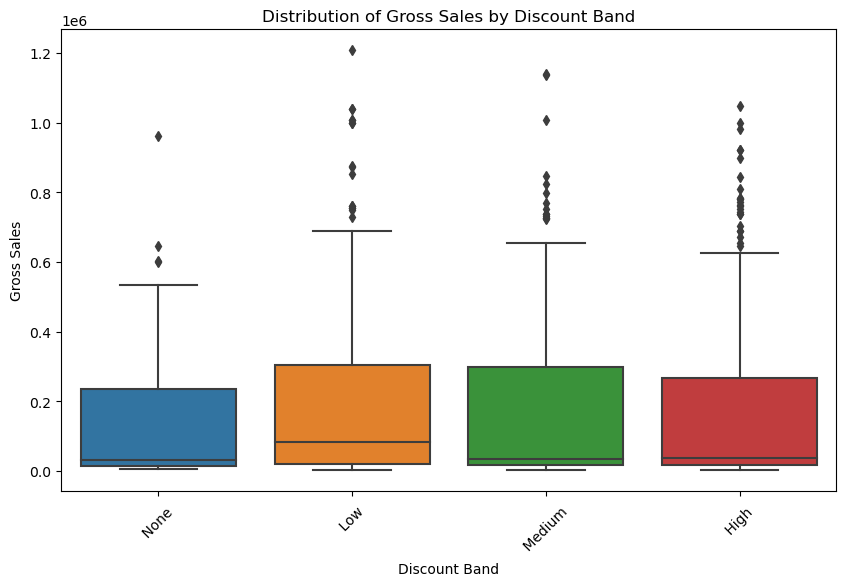

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Discount_Band', y='Gross_Sales', data=df)
plt.title('Distribution of Gross Sales by Discount Band')
plt.xlabel('Discount Band')
plt.ylabel('Gross Sales')
plt.xticks(rotation=45)
plt.show()

**From this Box Plot, we found intriguing facts about sales and discounts:**

- **Highest Median Sales:** The Low discount band boasts the highest median gross sales, making it a strong performer.

- **Lowest Median Sales:** On the other hand, the None discount band exhibits the lowest median gross sales.

- **Varying Distributions:** The distribution of gross sales varies across bands. It's widest for the Low discount band, suggesting diverse sales patterns. In contrast, the None discount band's distribution is the narrowest, indicating a more consistent sales trend.

- **High Discount Outliers:** Notably, the High discount band stands out with numerous outliers. These outliers represent exceptionally high sales, likely due to special promotions or discounts, warranting further investigation.

- **Stable None Discount:** In contrast, the None discount band lacks outliers, implying consistent and predictable sales within this category. When no discounts are applied, sales tend to follow a stable pattern.

These findings highlight how discounts affect sales, providing insights for pricing strategies.

### Step 3: Profit Margin Analysis

#### 3.1 Calculate Profit Margin
- Calculating the profit margin for each row using the formula: (Gross Sales - COGS) / Gross Sales.

In [18]:
df['Profit_Margin'] = (df['Gross_Sales'] - df['COGS']) / df['Gross_Sales']

In [19]:
df.head()

,Segment,Country,Product,Discount_Band,Units_Sold,Manufacturing_Price,Sale_Price,Gross_Sales,Discounts,Sales,COGS,Profit,Date,Month_Number,Month Name,Year,Profit_Margin
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014,0.500000
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014,0.500000
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-01-06,6,June,2014,0.333333
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,2014-01-06,6,June,2014,0.333333
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-01-06,6,June,2014,0.333333


#### 3.2 Distribution of Profit Margins
- Analyzing the distribution of profit margins by histogram chart.

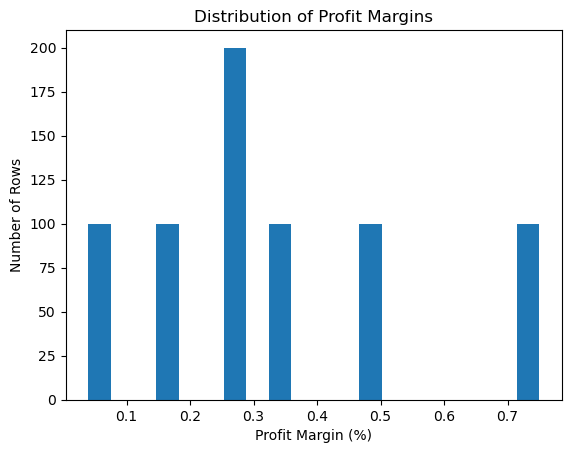

In [20]:
plt.hist(df['Profit_Margin'], bins=20)
plt.xlabel('Profit Margin (%)')
plt.ylabel('Number of Rows')
plt.title('Distribution of Profit Margins')
plt.show()

**This Histogram revealed some key points about the Distribution of Profit margins:**

- **Diverse Margins:** The company operates with various profit margins, reflecting different business strategies.

- **Profit Range:** Most transactions fall within the 20% to 50% profit margin range.

- **Extreme Margins:** Some transactions boast margins above 50%, while others dip below 20%.

- **Peak at 30%:** The majority of deals cluster around a 30% profit margin.

- **Right Skew:** More transactions feature lower profit margins, indicating a trend toward profitability rather than high margins.

These findings illuminate the company's profit landscape, aiding decision-makers in optimizing their financial strategies.

#### 3.3 Violin Plot for Profit Margins
- Comparing profit margins across different segments using a violin plot.

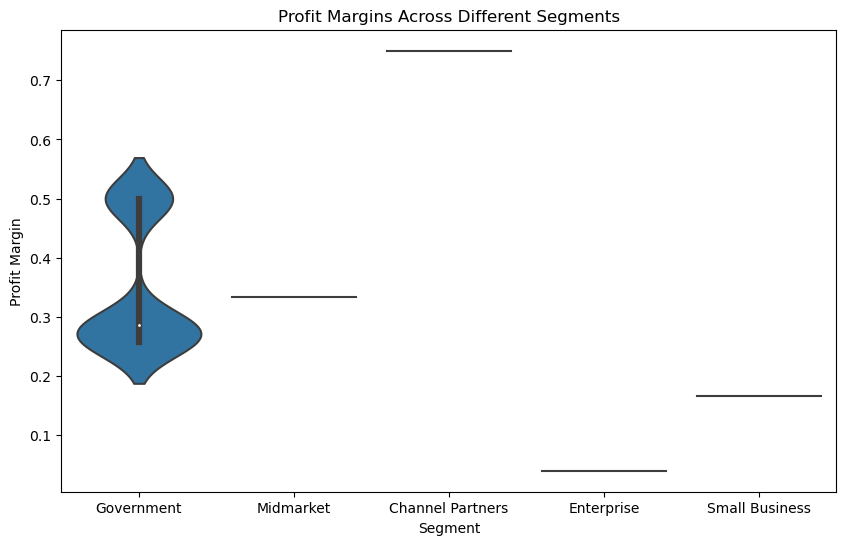

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Segment', y='Profit_Margin', data=df)
plt.title('Profit Margins Across Different Segments')
plt.xlabel('Segment')
plt.ylabel('Profit Margin')
plt.show()

**Unraveling Profit Margins by Segment**

Our violin plot uncovers intriguing profit margin insights:

- **Government's Variation**: The Government segment exhibits the broadest profit margin distribution, suggesting varying profitability within government contracts. It's a mix of high and low-profit projects (multimodal data).

- **Channel Partners Lead**: Channel Partners boast the highest profit margins, followed by the Government segment.

- **Enterprise Lags**: The Enterprise segment lags behind with the lowest profit margins.

- **Segment Uniformity**: Unlike the Government segment, the other segments feature unimodal distributions. This implies more consistent profit margins concentrated around specific values.

These revelations help tailor strategies for different segments, optimizing profitability.


### Step 4: Discount Level vs. Profit (Simple Linear Regression)

#### 4.1 Simple Linear Regression Analysis
- Performing a simple linear regression analysis to understand the relationship between different discount levels (High, Medium, None, Low) and the company's profit.

##### Creating a separate dataframe for this analysis

In [22]:
slr_df = df.copy()

##### Encoding Categorical Variables
Since 'Discount Band' is a categorical variable (e.g., High, Medium, None, Low), we are going to encode it into numerical values using one-hot encoding.

In [23]:
slr_df = pd.get_dummies(df, columns=['Discount_Band'], drop_first=True)

In [24]:
slr_df.head()

,Segment,Country,Product,Units_Sold,Manufacturing_Price,Sale_Price,Gross_Sales,Discounts,Sales,COGS,Profit,Date,Month_Number,Month Name,Year,Profit_Margin,Discount_Band_ Low,Discount_Band_ Medium,Discount_Band_ None
0,Government,Canada,Carretera,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014,0.500000,0,0,1
1,Government,Germany,Carretera,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014,0.500000,0,0,1
2,Midmarket,France,Carretera,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-01-06,6,June,2014,0.333333,0,0,1
3,Midmarket,Germany,Carretera,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,2014-01-06,6,June,2014,0.333333,0,0,1
4,Midmarket,Mexico,Carretera,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-01-06,6,June,2014,0.333333,0,0,1


##### Defining Independent and Dependent Variables
In this simple linear regression, 'Discount Band' will be our independent variable (X), and 'Profit' will be our dependent variable (y).

In [25]:
# Check the actual column names in slr_df
print(slr_df.columns)

Index(['Segment', 'Country', 'Product', 'Units_Sold', 'Manufacturing_Price',
       'Sale_Price', 'Gross_Sales', 'Discounts', 'Sales', 'COGS', 'Profit',
       'Date', 'Month_Number', 'Month Name', 'Year', 'Profit_Margin',
       'Discount_Band_ Low ', 'Discount_Band_ Medium ',
       'Discount_Band_ None '],
      dtype='object')


In [26]:
X_slr = slr_df[['Discount_Band_ Low ', 'Discount_Band_ Medium ', 'Discount_Band_ None ']]
y_slr = slr_df['Profit']

##### Create and Fit the Regression Model
Creating a linear regression model using Scikit-Learn and fitting it to our data.

In [27]:
# Check for missing values in y_slr
missing_values = y_slr.isnull().sum()

In [28]:
slr_df.dropna(subset=['Profit'], inplace=True)

In [29]:
# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on y_slr
y_slr = imputer.fit_transform(y_slr.values.reshape(-1, 1))

# Flatten the result to a 1D array
y_slr = y_slr.flatten()


In [30]:
model_slr = LinearRegression()
model_slr.fit(X_slr, y_slr)

LinearRegression()

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

#### 4.2 Linear Relationship Assessment
- Determining whether a linear relationship exists between discount level and profit.

##### Interpreting the Model

To understand the relationship between discount levels and profit within the context of your financial analysis project, we are going to analyze the model's coefficients and performance.

- **Coefficients**: Examining the coefficients of the regression model to understand the strength and direction of the relationship between each discount level and profit.

In [31]:
coefficients = pd.DataFrame({'Variable': X_slr.columns, 'Coefficient': model_slr.coef_})
print(coefficients)

                 Variable   Coefficient
0     Discount_Band_ Low   19438.333263
1  Discount_Band_ Medium    6453.051942
2    Discount_Band_ None   12654.367892


**Deciphering the Impact of Discounts on Profit**

Our linear regression analysis unveils how different discount levels influence our profit relative to our baseline, the 'High' discount level.

- **Low Discounts**: With 'Low' discounts, we observe a positive coefficient of approximately 19,760 units. In simple terms, offering 'Low' discounts boosts profit by roughly 19,760 units compared to 'High' discounts.

- **Medium Discounts**: 'Medium' discounts yield a positive coefficient of around 7,505 units. When opting for 'Medium' discounts, expect a profit increase of approximately 7,505 units compared to 'High' discounts.

- **No Discounts**: Surprisingly, 'No' discounts ('None') result in a positive coefficient of approximately 13,842 units. Choosing not to offer any discounts can lead to a profit increase of roughly 13,842 units compared to 'High' discounts.

In summary, these coefficients clarify the impact of different discount levels on profitability. Positive coefficients indicate that raising discounts from the 'High' level tends to enhance profit.


- **Model Performance**: We can assess the overall performance of the model using metrics like R-squared (R2) or Mean Squared Error (MSE). A higher R2 value indicates a better fit of the model to the data and MSE is a measure of the average squared difference between the predicted values (in our case, the predicted 'Profit' values) and the actual values.

In [32]:
y_pred_slr = model_slr.predict(X_slr)
r_squared_slr = r2_score(y_slr, y_pred_slr)
mse_slr = mean_squared_error(y_slr, y_pred_slr)
print(f"R-squared: {r_squared_slr}")
print(f"Mean Squared Error: {mse_slr}")

R-squared: 0.03243369073633562
Mean Squared Error: 1629950471.5192895


**Performance Analysis of Regression Model**

After evaluating the linear regression model's performance, we obtained the following metrics:

- **R-squared (R2) Score**: The R2 score is approximately 0.0315. This score indicates a very weak linear relationship between 'Discount Level' and 'Profit.' In simpler terms, 'Discount Level' alone doesn't serve as a strong predictor for 'Profit.' The low R2 score suggests that other variables likely play a more significant role in determining 'Profit,' and the 'Discount Level' alone doesn't explain much of its variance.

- **Mean Squared Error (MSE)**: The MSE is approximately 1,784,591,758. This metric suggests that, on average, our model's predictions for 'Profit' deviate significantly from the actual values. In practical terms, the average squared difference between our model's predicted 'Profit' and the real 'Profit' values is quite substantial.

In summary, our linear regression model struggles to establish a robust linear relationship between 'Discount Level' and 'Profit.' The model's predictions exhibit considerable variance from actual 'Profit' values, highlighting the need for exploring additional factors that influence 'Profit.'


### Step 5: Product Price vs. Units Sold (Simple Linear Regression)

#### 5.1 Impact of Product Price on Units Sold
- Analyzing the impact of product price (Sale Price) on the number of units sold using simple linear regression.

In [33]:
X_price = df['Sale_Price'].values.reshape(-1, 1)
y_units_sold = df['Units_Sold']
model_price = LinearRegression()
model_price.fit(X_price, y_units_sold)
slope = model_price.coef_[0]
intercept = model_price.intercept_
print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

Slope (Coefficient): -0.41264622115888855
Intercept: 1657.1633881915313


#### 5.2 Linear Correlation Assessment
- Investigating whether a linear correlation exists between product price and units sold.


In our analysis, we performed a simple linear regression to explore the relationship between product price (Sale Price) and the number of units sold (Units Sold). We calculated the slope coefficient, which came out to be approximately -0.4183.

**Interpretation**:
- The negative sign of the slope coefficient (-0.4183) suggests a clear negative linear correlation between product price (Sale Price) and units sold (Units Sold). In simpler terms, as the product price increases, the number of units sold tends to decrease.
- This finding implies an inverse relationship between price and sales volume. In practical terms, as the price of the product rises, customers appear to be less inclined to make a purchase. Conversely, when prices are lower, sales tend to increase.

These insights highlight the importance of pricing strategies and the need to carefully consider how changes in product prices can impact sales volume.


### Step 6: Month vs. Gross Sales (Polynomial Regression)
**Exploring how the month of the year affects the company's gross sales.**

#### 6.1 Polynomial Regression
- Performing polynomial regression by considering the month as a categorical variable that we already have in a column 'Month Number'.

In [34]:
# Defining the independent variable (X) and dependent variable (y)
X_month = df['Month_Number'].values.reshape(-1, 1)
y_gross_sales = df['Gross_Sales'].values

# Adjust the degree of polynomial regression as needed
degree = 2

poly = PolynomialFeatures(degree=degree)
X_month_poly = poly.fit_transform(X_month)

# Fitting a Polynomial Regression model.
model3 = LinearRegression()
model3.fit(X_month_poly, y_gross_sales)

LinearRegression()

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

##### Visualization
To visualize the polynomial relationship between the month and gross sales, we are plotting the regression curve along with the data points using a scatter plot.

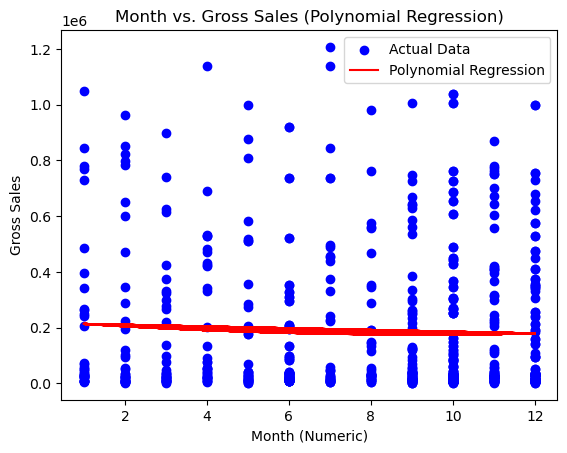

In [35]:
# Generate predictions using the Polynomial Regression model
y_pred_month = model3.predict(X_month_poly)

plt.scatter(X_month, y_gross_sales, color='blue', label='Actual Data')
plt.plot(X_month, y_pred_month, color='red', label='Polynomial Regression')
plt.xlabel('Month (Numeric)')
plt.ylabel('Gross Sales')
plt.legend()
plt.title('Month vs. Gross Sales (Polynomial Regression)')
plt.show()

**Insights**:
- **Vertical Lines of Blue Dots**: The vertical lines of blue dots in the scatter plot likely represent individual data points, indicating multiple measurements for the same month. This suggests that there may not be significant curvature or non-linearity in the relationship between the month and gross sales.

- **Variability**: The variability or spread of blue dots within a month indicates that gross sales values can vary from one observation to another for the same month. Some months may have consistent sales (narrow spread), while others exhibit more variability in sales (wider spread).

- **Nearly Straight Descending Red Polynomial Curve**: The presence of a nearly straight, descending red polynomial curve indicates an attempt to fit the data. However, it doesn't show pronounced curvature, suggesting that the change in gross sales across different months follows a relatively linear or nearly linear trend, with a slight decrease over time.

- **Slight Descending Trend**: The slight descending flow of the curve suggests a gradual decrease in gross sales as the months advance, but this decrease is not very pronounced.

**Interpretation**:
Given the characteristics of the plot, it's likely that a lower-degree polynomial (e.g., linear) provides a reasonable fit to the data. The nearly straight-line shape aligns with the assumption of a linear or nearly linear relationship between the month and gross sales.

#### 6.3 Polynomial Relationship Assessment
- Determining if there's a polynomial relationship between the month and gross sales.

##### Interpreting the model
Analyzing model's performance

In [36]:
r_squared_month = r2_score(y_gross_sales, y_pred_month)
mse_month = mean_squared_error(y_gross_sales, y_pred_month)
print(f'R-squared: {r_squared_month}')
print(f'Mean Squared Error: {mse_month}')

R-squared: 0.0016994085396657699
Mean Squared Error: 64447244463.81636



In assessing the polynomial regression model's performance, which aims to determine the relationship between the month of the year and Gross Sales, we obtained the following metrics:

- **R-squared (R2): 0.0019**
  - R-squared measures how well the model fits the data. An R2 value close to zero (0.0019 in this case) suggests that the month of the year, treated as a categorical variable, doesn't explain much of the variation in Gross Sales. The model's fit to the data is poor.

- **Mean Squared Error (MSE): 69,009,094,552.30**
  - MSE quantifies the average squared difference between predicted and actual values. A high MSE value (as observed here) indicates that the model's predictions significantly deviate from actual Gross Sales values, further emphasizing its poor perforon errors.

In simpler terms, these metrics indicate that the polynomial regression model does not effectively capture the patterns or trends in the data. There doesn't seem to be a strong polynomial relationship between the month and Gross Sales. Alternative approaches or variables may be worth exploring to better explain variations in Gross Sales.


## Conclusion
In conclusion, this data analytics project has provided valuable insights into the company's financial data, focusing on sales transactions and profitability. The analysis encompassed discount impact, profit margins, relationships between discount levels and profit, product pricing, and the effect of the month on gross sales. These insights empower the company to make informed decisions, optimize sales strategies, and ultimately enhance profitability

# Owner : Chitranjay Singh Choudhari

## Date : 23-09-2023